# PLOTTING AND FUNCTIONS REVISITED


online-ds-pt-100719<br>
12/3/19

# OUTLINE
- Revisit figure anatomy now that we have learned about OOP.

- Revisit Mod 1 project dataset / Boston housing to perform EDA.
- Create a high quality customized figure for EDA.
- Convert our plotting code into a working function.
- Take a step back and think about what we may want to change in the future.
- Add additional flexibility to our function to accommodate those future changes.

# OOP Vocab (Review)


- "Object" is an instance of a template class that currently exists in memory


- "Calling" a function: 
    - When we use `( )` with a function we are calling it.

- **Function:**  Codes that maniuplates data in a useful way. 

- Parameters: the defined data/varaibles that are passed accepted by a function
- Argument: the actual variable/value passed in for a parameter
- Positional Argument:
    - The first arguments required
    - their id is determined by their order
- Keyword/default Arguments:
    - arugments that have a defined default value
    - must come after positional arguments

<br><br>
- **Class:** Template/blue print.
- Instance: Ab object built from the class blueprint
- Attribute: A variable stored inside an object. 
- Method: Functions are stored inside an object.
    - Objects always pass themselves into a method, so we used `self` to account for this.
- Private Attributes/Methods: they start with _ and are hidden from the user. They can be updated using getting and setting functions.
- Getters/Setters:
    - Methods for retreiving or changing private attributes

- "dunders" = double underscores __ 

##  Matplotlib Refs


### Example Galleries
- Matplotlib is the backbone of plotting in python and used by pandas,seaborn,etc.
    - [Matplotlib Example Gallery](https://matplotlib.org/gallery/index.html#examples-index) 
    - [Seaborn Example Gallery](https://seaborn.pydata.org/examples/index.html)
    - ['Pandas Visualization docs']('https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html')

### A Tale of Two Syntaxes
-  *Matplotlib is powerful but can be a bit confusing at times because of its 2 sets of commands:*
    - the matplotlib.pyplot functions (`plt.bar()`,`plt.title()`)
    - the object_oriented methods (`ax.bar()`,`ax.set_title()`)
    
- The 2 syntaxes can be confusing at first and cause problems & odd results when mixed together.
    - Learn about some of the problems when mixing types.
    - Example: see how plt.title()/plt.xlabel(),etc. can behave strangely in subplots.
    
    - **Bookmark this article, its the best explanation of how matploblib'S 2 interfaces work:**
> ["Artist" in Matplotlib - something I wanted to know before spending tremendous hours on googling how-tos.](https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo)<br>

- [My Blog Post on Making Customized Figures in seaborn](https://jirvingphd.github.io/harnessing_seaborn_subplots_for_eda)
    - This covers some concepts we didn't have time to cover, like ticklabel formatters.


### **Matplotlib Documentation**
- [Markers](https://matplotlib.org/3.1.1/api/markers_api.html)
- [Colors](https://matplotlib.org/3.1.0/gallery/color/named_colors.html )
- [Text](https://matplotlib.org/3.1.0/tutorials/text/text_intro.html )
- [Text Properties](https://matplotlib.org/3.1.1/tutorials/text/text_props.html)

- [Tick Formatters](https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-formatters.html)


### Cheat Sheets

- [Matplotlib and Seaborn Pages in our Master Cheat sheets pdf](https://drive.google.com/open?id=1PxRAhlaK7ucf0S2F732eJ94ovaPtUSE_)

## Matplotlib Anatomy / Structure



<center><img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/matplotlib_anatomy.png" width=400></center>

- Matplotlib Figures are composed of 3 different types of objects:
    - `Figure` is the largest bucket and contains everything else. It is like a picture frame without any actual images in it.
  - `Axes` are the actual plot / image inside of the Figure / frame. 
        - this is the same `ax` as in `fig, ax = plt.subplots()` and that is returned when you create a Pandas or Seaborn figure.
        - There is an 'Axes` for each subplot in the Figure
        - `Axes` contain information about the titles, labels, grid,background, they also contain an. See the figure below for the contents of `Axes`
    - Inside Axes there is an `Axis` which is further divided into an `Axis.xaxis` and an `Axis.yaxis` that contain the ticks and the tick lables.
    <center><img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/matplotlib_Axes_layout2.png" width=500></center>
  

# Group Activity:
- Let's build an EDA figure together
- Let's turn it into a function.
- Let's add a docstring
- Let's add some more customization / flexibility.


In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.4.45 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)

In [3]:
## OPTION 1: MOD 1 DATASET
df = fs.datasets.load_mod1_proj()
display(df.head())
display(df.info())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

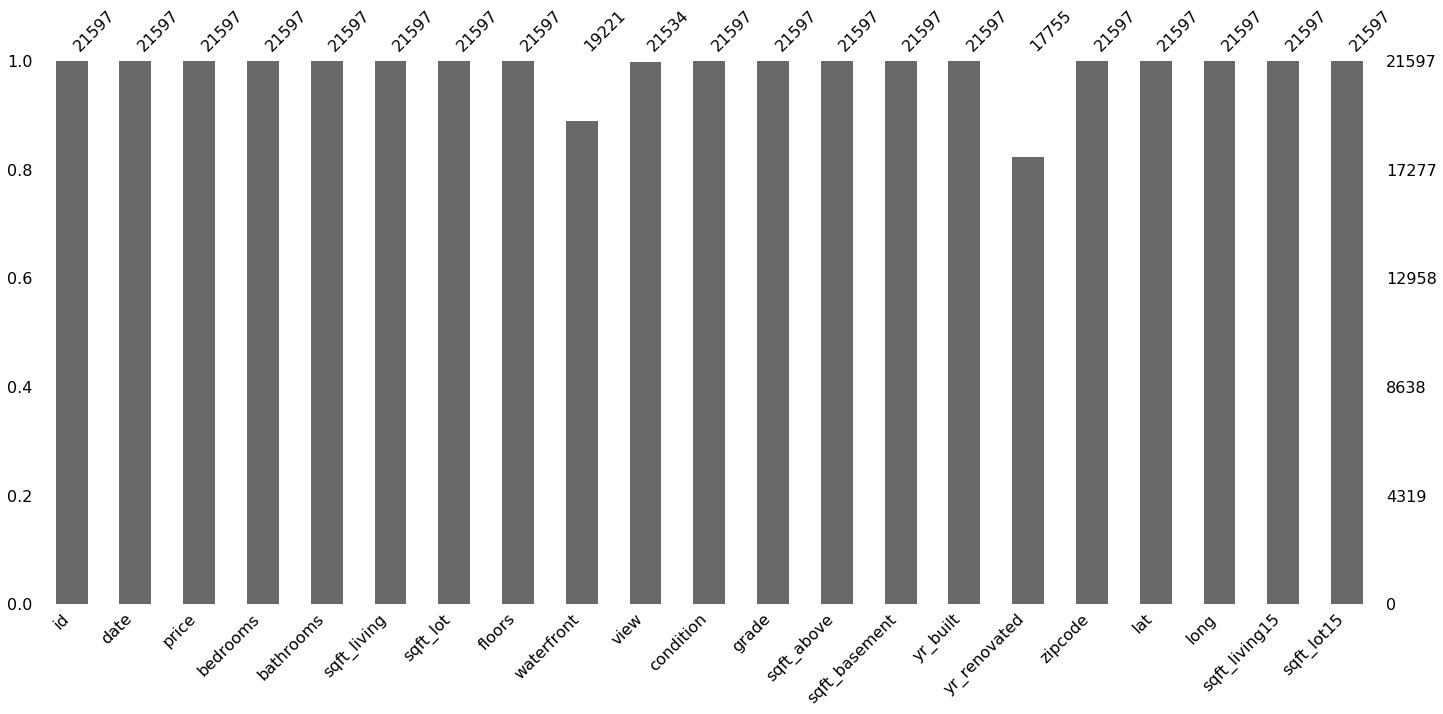

In [4]:
## Check for Null Values
import missingno as ms
ms.bar(df)

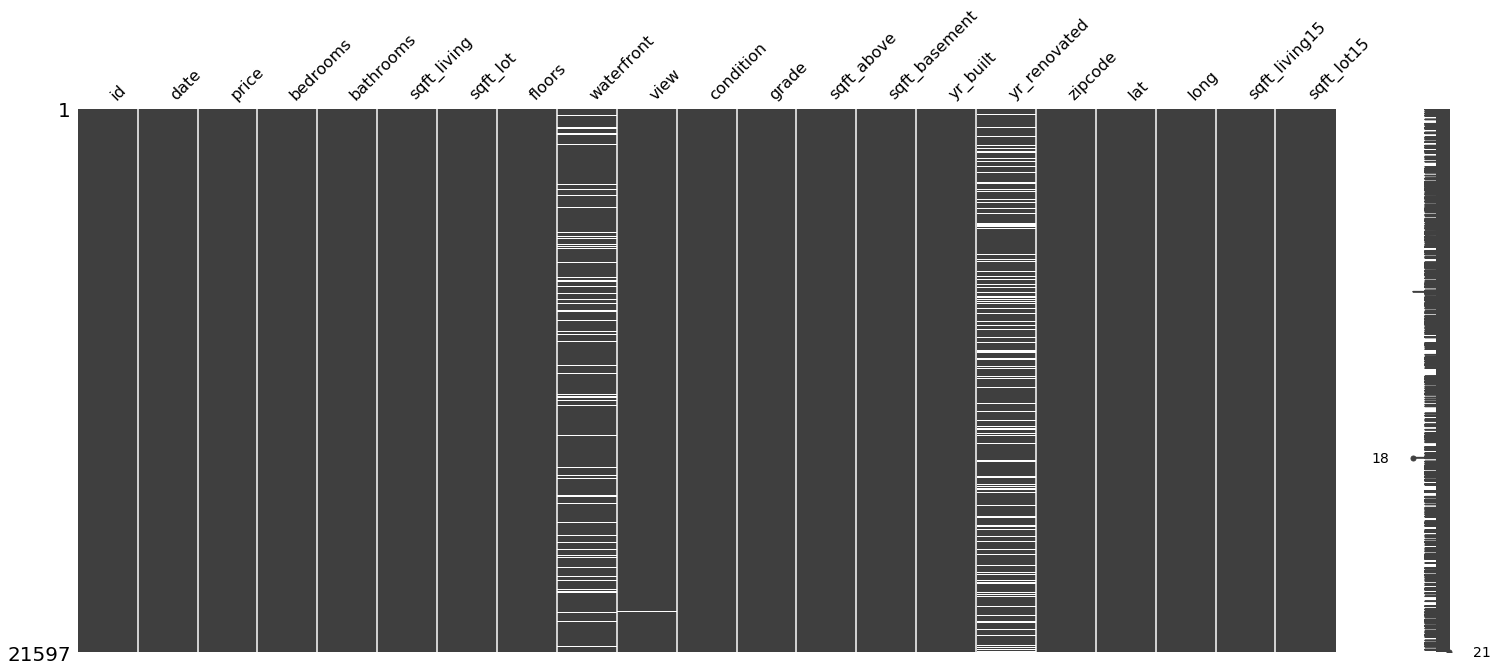

In [5]:
ms.matrix(df)

In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
## Drop Problematic Columns (in the interest of time)
cols_to_drop = ['id','date','waterfront',
                'view','yr_renovated','sqft_basement']
df.drop(cols_to_drop,axis=1,inplace=True)

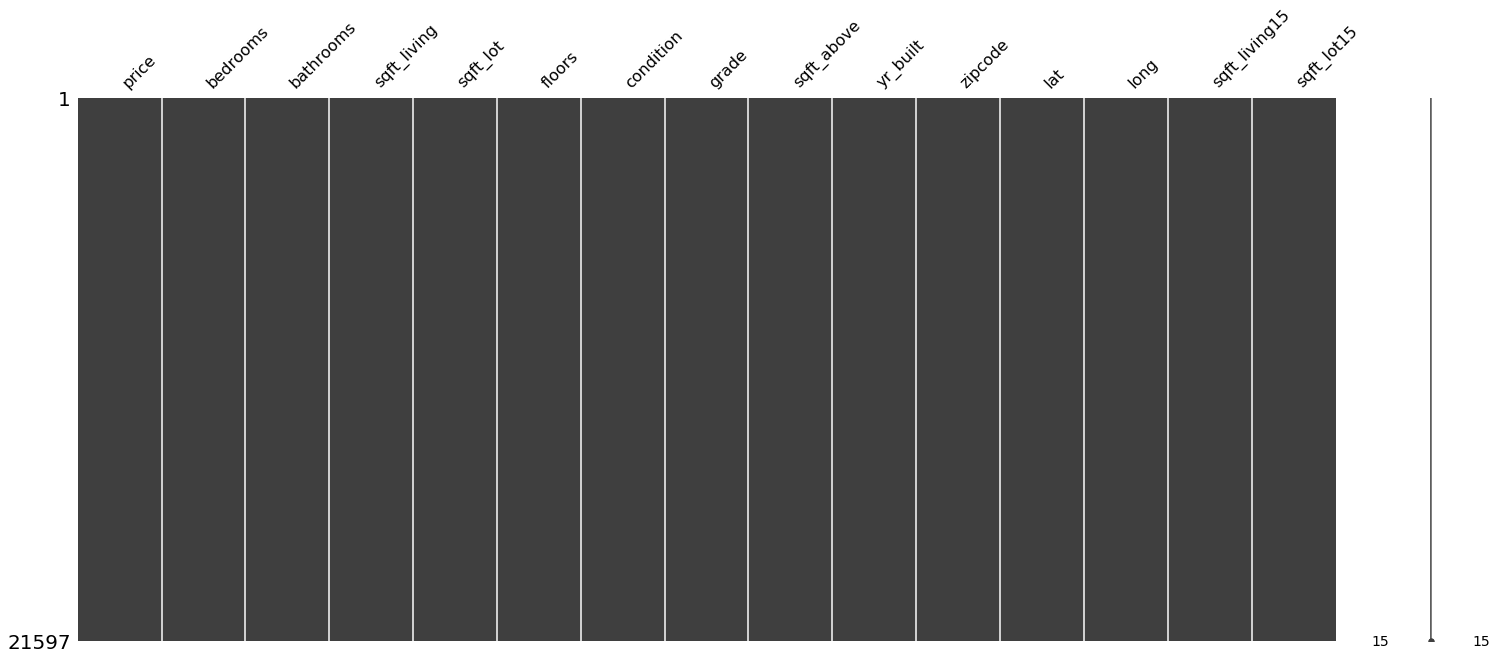

In [9]:
ms.matrix(df)

## Let's build an EDA by column figure together


### Q: What kind of plots do we want to make as part of our EDA? (At least 1 Seaborn)
- Histograms / Distplot
- Scatterplot (vs target- price)

In [32]:
# fig, ax = plt.subplots(figsize=(10,5))
# ax.se

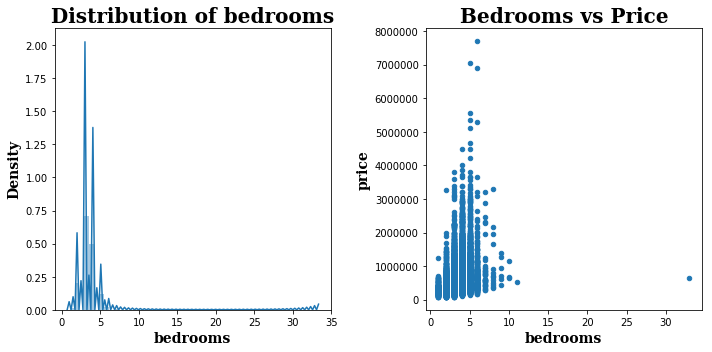

In [41]:
# Lets write our plot together
col = 'bedrooms'
fig, axes = plt.subplots(ncols=2,figsize=(10,5))

ax = axes[0]
sns.distplot(df[col],ax=ax)

label_fonts = {'weight':'bold',
               'family':'serif',
              'size':14}
title_fonts = {'weight':'bold',
               'family':'serif',
              'size':20}

ax.set_title(f'Distribution of {col}',fontdict=title_fonts)


ax.set_ylabel('Density',fontdict=label_fonts)
ax.set_xlabel(ax.get_xlabel(),fontdict=label_fonts)

ax = axes[1]
df.plot(kind='scatter',x=col,y='price',ax=ax)
ax.set_title(f"{col.title()} vs Price",fontdict=title_fonts)
ax.set_ylabel(ax.get_ylabel(),fontdict=label_fonts)
ax.set_xlabel(ax.get_xlabel(),fontdict=label_fonts)


plt.tight_layout()

## Let's turn it into a function.


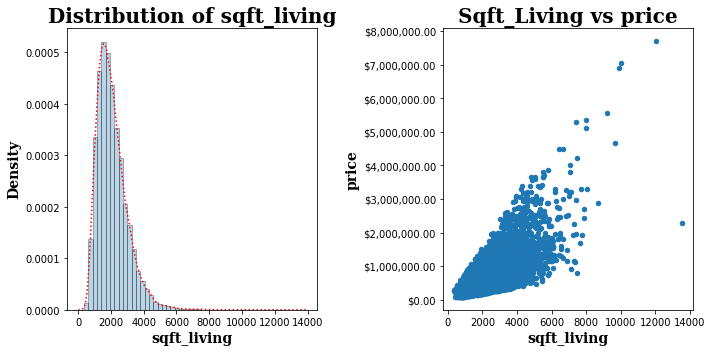

In [65]:
def eda_plot(df, col = 'bedrooms', target='price',
            figsize=(10,5),hist_kws = None, kde_kws = None):
    """Plots a seaborn disrplot and a scatter plot of col vs target.
    
    Args:
        df (DataFrame): data to plot
        col (str): Name of the column to plot
        target (str): Name of the target variable for scatterplot
        figsize (tup): Figsize
        hist_kws (dict): Keywords for seaborn distplot histogram
        kde_kws (dict): Keywords for seaborn distplot kde
        
    Returns:
        fig (Figure Object)
        ax (list of Axes objects)
    """
    # Lets write our plot together

    fig, axes = plt.subplots(ncols=2,figsize=figsize)

    ax = axes[0]
    
    
    if hist_kws is None:
        hist_kws = {'edgecolor':'black',
                   'alpha':0.3}
        
    if kde_kws is None:
        kde_kws = {'color':'black'}
    
    sns.distplot(df[col],ax=ax,kde_kws=kde_kws, hist_kws=hist_kws)

    label_fonts = {'weight':'bold',
                   'family':'serif',
                  'size':14}
    title_fonts = {'weight':'bold',
                   'family':'serif',
                  'size':20}

    ax.set_title(f'Distribution of {col}',fontdict=title_fonts)


    ax.set_ylabel('Density',fontdict=label_fonts)
    ax.set_xlabel(ax.get_xlabel(),fontdict=label_fonts)

    ax = axes[1]
    df.plot(kind='scatter',x=col,y=target,ax=ax)
    ax.set_title(f"{col.title()} vs {target}",fontdict=title_fonts)
    ax.set_ylabel(ax.get_ylabel(),fontdict=label_fonts)
    ax.set_xlabel(ax.get_xlabel(),fontdict=label_fonts)
    
#     fmtPrice = '${x:,.0f}'

    tick_format = mpl.ticker.StrMethodFormatter('${x:,.2f}')
    ax.yaxis.set_major_formatter(tick_format)
        # Formatting dollar sign labels
#     tickPrice = mtick.StrMethodFormatter(fmtPrice)


    plt.tight_layout()
    plt.show()
    
    return fig, axes
    
f,a = eda_plot(df,col='sqft_living',kde_kws={'color':'red','ls':':'})

## Below we created a `figures.py` file in the same folder and imported the py file as a module

In [60]:
import figures as fg

In [61]:
help(fg)

Help on module figures:

NAME
    figures

FUNCTIONS
    eda_plot(df, col='bedrooms', target='price', figsize=(10, 5), hist_kws=None, kde_kws=None)
        Plots a seaborn disrplot and a scatter plot of col vs target.
        
        Args:
            df (DataFrame): data to plot
            col (str): Name of the column to plot
            target (str): Name of the target variable for scatterplot
            figsize (tup): Figsize
            hist_kws (dict): Keywords for seaborn distplot histogram
            kde_kws (dict): Keywords for seaborn distplot kde
            
        Returns:
            fig (Figure Object)
            ax (list of Axes objects)

FILE
    /Users/jamesirving/Documents/GitHub/_STUDY GROUP PREP/fsds_pt_100719_cohort_notes/figures.py




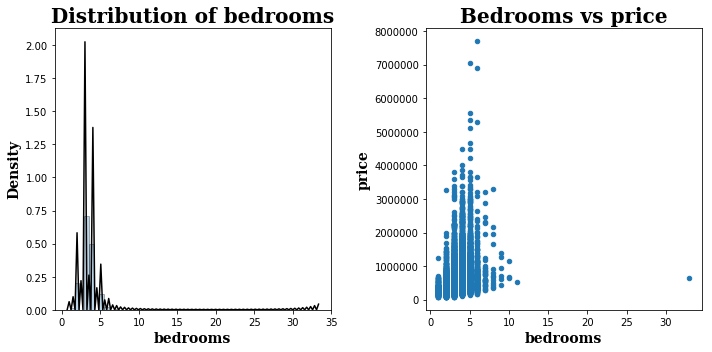

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x12a118d68>,
       dtype=object))

In [66]:
fg.eda_plot(df)


In [ ]:
# fig.set_

# Misc. Notes re: Functions 
(didn't discuss together)


**Functions**:
- try,except,finally
- raising Exceptions

- Using `verbose` to control outputs:
    - `verbose=0,1,2`
    - `if verbose: display(...)`
- Using 'isinstance'




**1. `try,except,finally`**
```python
try:
    some_func_that_may_error(inputs)
except:
    what_to_do_when_error_happens
    # note: good place to print type, shape, etc. to help diagnose errors
finally: #optional
    run_this_code_no_matter_what
```
- Note: **if you don't want anything to happen** if there's an error, then just make `except:` be a `pass` command.
    
```python
try:
    some_func_that_may_error(inputs)
except:
    
    msg = f"the shape was {inputs.shape}"
    raise Exception(msg)
    pass

```
- Additionally, you can specify what TYPE of errors to handle:
    
```python
try: 
    function_that_calls_a_var(data=my_var) # if my_var doesn't exist, will raise a `NameError`
except NameError:
    my_var = func_to_create_var()
```


**2. raising Exceptions:**
    - You can write your own errors + error msgs in your function
    - This is helpful for giving the user specific information as to how to resolve the error.
    
    
```python
def my_func(arg1, arg2,option_1=True, option_2=False, option_3=False):
    """Function takes arg1, arg2 and then processes it according to which
    option==True. """
    
    # check if >1 parameter is True:
    if np.sum([option_1, option_2,option_3])>1: 
        raise Exception('Only 1 of option_1,option_2,option_3 may be True')
    ...
```

**3. Using verbose**

    - a general practice is to specify verbosity as 0,1,2.
        - 0 being little-to-no details, 1 being more, 2 being the most details.
    - Can be very good for troubleshooting or for print outs that provde/demonstrate what the function did/generated.
    
```python
def my_func(arg1,arg2,verbose=1):
   if verbose: # if verbose==either 1 or 2
        print(arg1.shape,arg2.shape)
    ...
    
```

**4. Using `isinstance` instead of `type==`:**

- Using `type(var)==class_you_want` is not very helpful
    - There's a lot of types that it will not recognize
    - There's an entire `types` module you could import into Python
- What's better is using `isinstance(var_youre_checking,'list')`

```python
if isinstance(my_var,'list'):
    do_this_stuff...

# Note, for types from outside packages, you will need to reference the class in the library.

import pandas as pd
if isinstance(my_var, pd.DataFrame):
    do_this_stuff...
```
- What nice about using this in your functions is that **you can code-in the correct way of handling the input to make it compatible** with the rest of your function, instead of just raising an Error.

i.e. User inputs a single string or a Series instead of a list of strings:
```python
import pandas as pd
if isinstance(input_var,'list') == False:
    
    if isinstance(input_var,'str'):
        input_var = [input_var]
    elif isinstance(input_var, pd.Series):
        input_var=list(input_var)
        
    ## Now input_var should be in list form and you can loop like normal
    for entry in input_var:
        ...
```

